In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mtp
import sklearn.linear_model
import math

## Datos

In [2]:
fname = 'data.csv'

df = pd.read_csv(fname)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
campos = list(df.columns)
campos

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

# Descripción de los datos

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
df.groupby("diagnosis").mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


In [6]:
df.groupby("diagnosis").var()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,1.362815e+16,3.170222,15.961021,139.415582,18033.030100,0.000181,0.001139,0.001887,0.000253,0.000615,0.000046,0.012672,0.347133,0.594702,78.206998,0.000009,0.000267,0.001084,0.000033,0.000049,0.000009,3.925817,30.183536,182.982188,26765.425899,0.000401,0.008497,0.019703,0.001281,0.001743,0.000191,NaN
M,1.901546e+16,10.265431,14.284393,477.625870,135378.355365,0.000159,0.002915,0.005628,0.001182,0.000764,0.000057,0.119052,0.233461,6.597427,3764.468961,0.000008,0.000338,0.000467,0.000030,0.000101,0.000004,18.348967,29.537095,867.718099,357565.421850,0.000478,0.029027,0.032945,0.002144,0.005578,0.000465,NaN


Text(0, 0.5, 'Frecuencia')

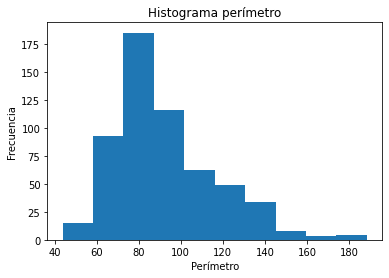

In [7]:
plt.hist(df['perimeter_mean'])
plt.title("Histograma perímetro")
plt.xlabel('Perímetro')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

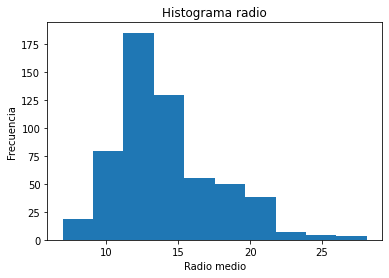

In [8]:
plt.hist(df['radius_mean'])
plt.title("Histograma radio")
plt.xlabel('Radio medio')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

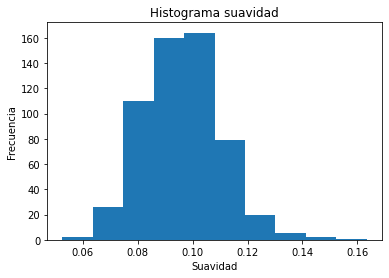

In [9]:
plt.hist(df['smoothness_mean'])
plt.title("Histograma suavidad")
plt.xlabel('Suavidad')
plt.ylabel('Frecuencia')

## Análisis Estadístico

In [10]:
def reglaDeSturge(N):
    #Sturge rule:
    K = int(1 + 3.322*np.log(N))
    return K

def cumulative(Y):
    Y_sort = np.sort(Y)
    try:
        n_Y = len(Y)
    except:
        n_Y = Y.shape[0]
        print(n_Y)
    t = np.linspace(1/n_Y,1,n_Y)
    return (t,Y_sort)

def pruebaTShuffling(df,categoric,c1,c2,campo,n_it):
    #df: dataframe
    #categoric, c1, c2, campo son strings. 
    #categoric: Variable categorica binaria a evaluar en el test, key del dataframe
    #campo: Variable aleatoria numerica a evaluar diferencia de medias, key del dataframe
    #c1: Primer grupo binario de categoric
    #c2: Segundo grupo binario de categoric

    maskc1 = df[categoric] == c1
    maskc2 = df[categoric] == c2

    dfA = df.loc[maskc1]
    dfB = df.loc[maskc2]
    
    prop = np.array(df[campo])
    propA = np.array(dfA[campo])
    propB = np.array(dfB[campo])
      
    realMeanA = np.mean(propA)
    realMeanB = np.mean(propB)
    realVarA = np.std(propA)
    realVarB = np.std(propB)
    
    real_diffMEAN = realMeanA - realMeanB
    real_diffSTD = realVarA - realVarB
    
    nA = len(propA)
    nB = len(propB)
    
    diffMEAN = np.zeros(n_it)
    diffSTD = np.zeros(n_it)

    for i in range(n_it):
        np.random.shuffle(prop) #Desordenar
        fakeA = prop[:nA]       #Poner en la mísma proporcion que las categorías originales
        fakeB = prop[nB:]       #Los datos se mezclan para asumir que pertenecen a la mísma distribución
        diffMEAN[i] = np.mean(fakeA) - np.mean(fakeB)
        diffSTD[i] = np.std(fakeA) - np.std(fakeB)
    
    if real_diffSTD > 0:
      pValorSTD = np.count_nonzero(diffSTD > real_diffSTD)/len(diffSTD)
    else:
      pValorSTD = np.count_nonzero(diffSTD < real_diffSTD)/len(diffSTD)
    
    if real_diffMEAN > 0:
      pValorMEAN = np.count_nonzero(diffMEAN > real_diffMEAN)/len(diffMEAN)
    else:
      pValorMEAN = np.count_nonzero(diffMEAN < real_diffMEAN)/len(diffMEAN)
    
    fig , ax = plt.subplots(2,2)
    fig.set_size_inches(15, 15)
    
    y , x , _ = ax[0,0].hist(diffMEAN,bins=reglaDeSturge(n_it),density = True,label ="Histograma")
    ax[0,0].vlines(real_diffMEAN, 0, y.max(), color = 'r', label = 'Diferencia real de medias')
    ax[0,1].plot(cumulative(diffMEAN)[1],cumulative(diffMEAN)[0])

    y , x , _ = ax[1,0].hist(diffSTD,bins=reglaDeSturge(n_it),density = True, label ="Histograma")
    ax[1,0].vlines(real_diffSTD, 0, y.max(), color = 'r', label = 'Diferencia de varianzas')
    ax[1,1].plot(cumulative(diffSTD)[1],cumulative(diffSTD)[0])

    ax[0,0].set_xlabel("Diferencia de medias Shuffling")
    ax[0,1].set_xlabel("Acumulativa de diferencia de medias")
    ax[1,0].set_xlabel("Diferencia de varianzas Shuffling")
    ax[1,1].set_xlabel("Acumulativa de diferencia de varianzas")

    ax[0,0].set_title(campo)
    ax[0,1].set_title(campo)
    ax[1,0].set_title(campo)
    ax[1,1].set_title(campo)
    
    ax[0,0].legend()
    ax[1,0].legend()

    fig2, ax2 = plt.subplots(1, 1)
    fig2.set_size_inches(7.5, 7.5)
    ax2.plot(cumulative(df[campo][maskc1])[1],cumulative(df[campo][maskc1])[0],label= campo + c1)
    ax2.plot(cumulative(df[campo][maskc2])[1],cumulative(df[campo][maskc2])[0],label = campo + c2)
    ax2.set_xlabel(campo)
    ax2.set_title("Distribucion acumulada")

    P = "P-value MEAN: {} , P-value STD: {}".format(pValorMEAN,pValorSTD) + ", DiffMeans : {} , DiffVars : {}".format(real_diffMEAN,real_diffSTD)
    return P

'P-value MEAN: 0.0 , P-value STD: 0.0, DiffMeans : 5.316306379155437 , DiffVars : 1.4183894494739786'

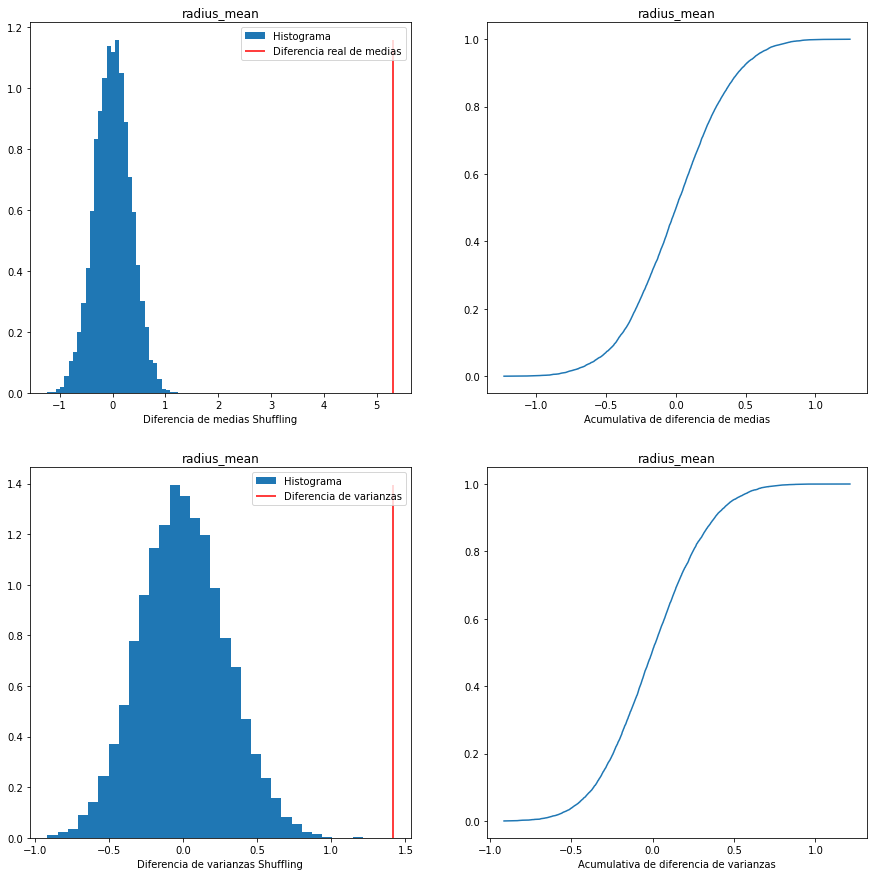

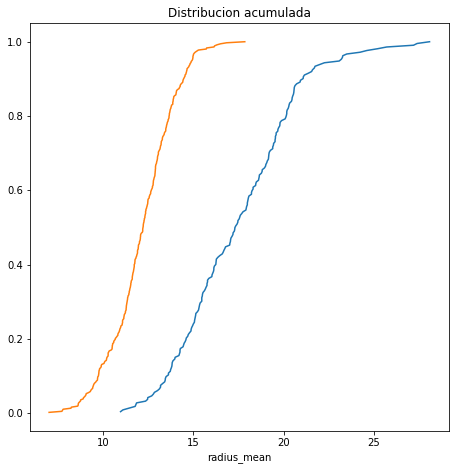

In [11]:
pruebaTShuffling(df,'diagnosis','M','B','radius_mean',10000)

'P-value MEAN: 0.0 , P-value STD: 0.0, DiffMeans : 37.28997119602556 , DiffVars : 10.012159414784682'

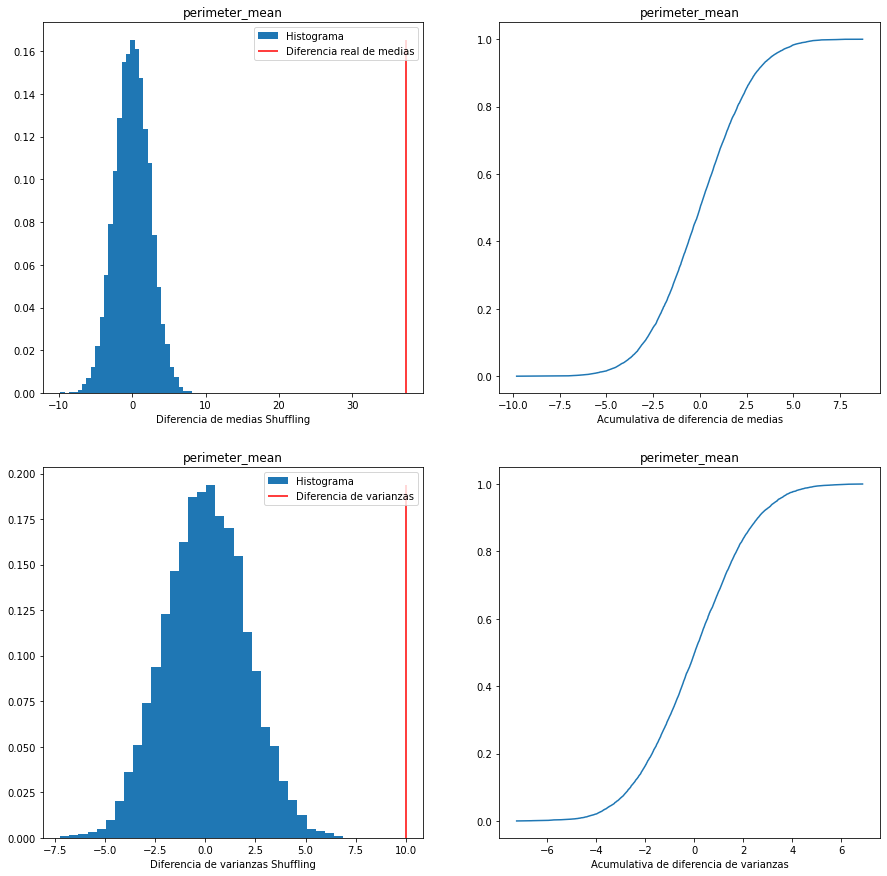

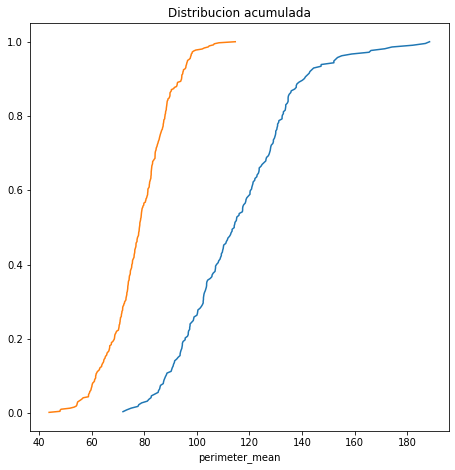

In [12]:
pruebaTShuffling(df,'diagnosis','M','B','perimeter_mean',10000)

'P-value MEAN: 0.3961 , P-value STD: 0.1414, DiffMeans : -0.00018730061836055856 , DiffVars : 0.0008175461927586898'

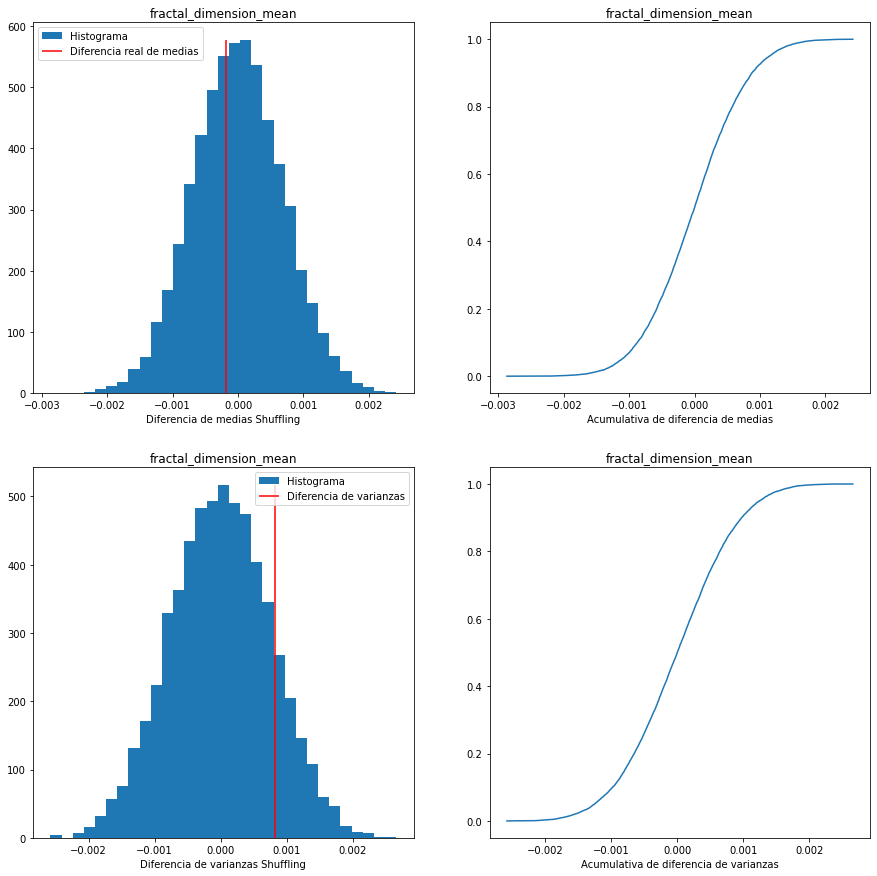

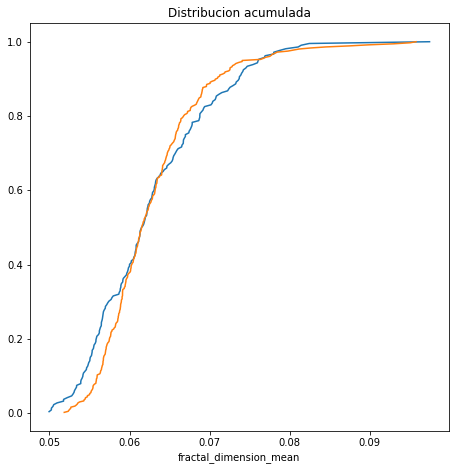

In [13]:
pruebaTShuffling(df,'diagnosis','M','B','fractal_dimension_mean',10000)

'P-value MEAN: 0.0 , P-value STD: 0.2337, DiffMeans : 0.010420843507214214 , DiffVars : -0.0008487681358775971'

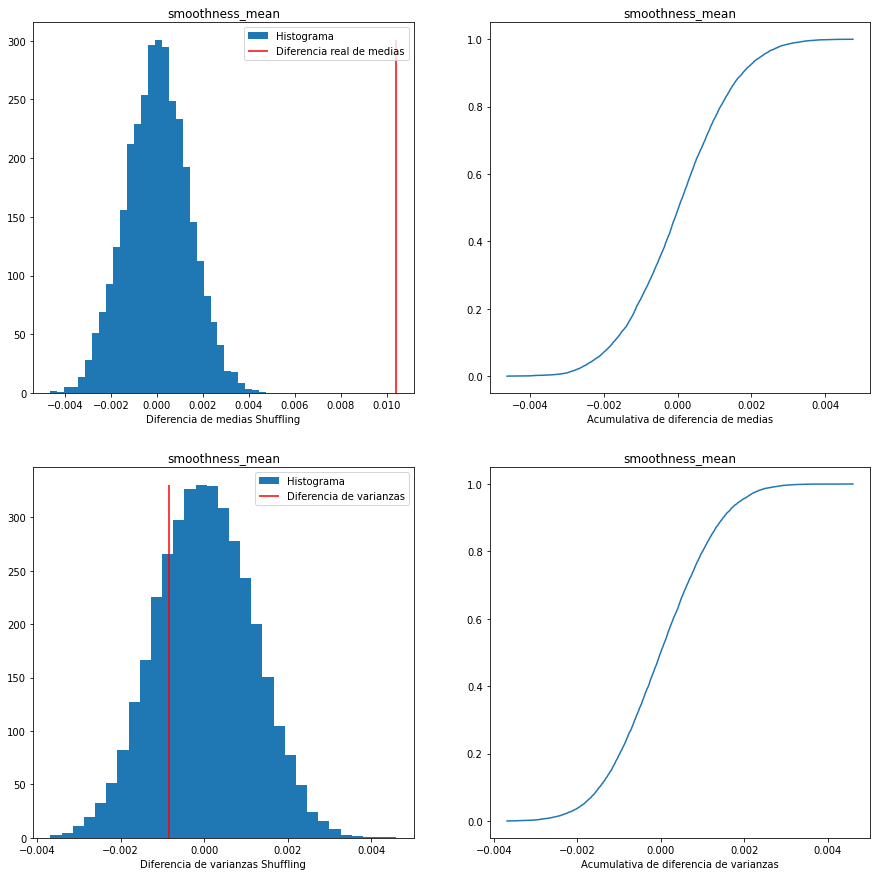

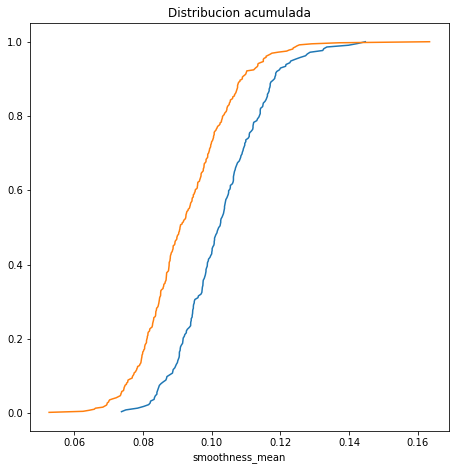

In [14]:
pruebaTShuffling(df,'diagnosis','M','B','smoothness_mean',10000)

'P-value MEAN: 0.0 , P-value STD: 0.0, DiffMeans : 515.5862190159085 , DiffVars : 232.97026455428522'

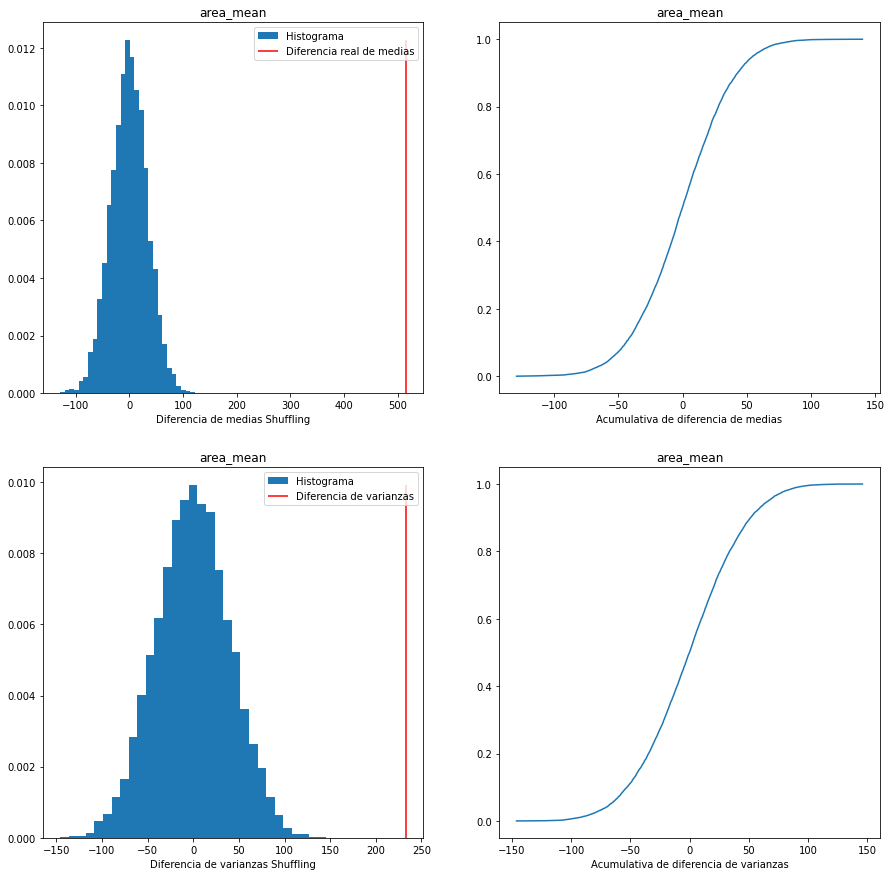

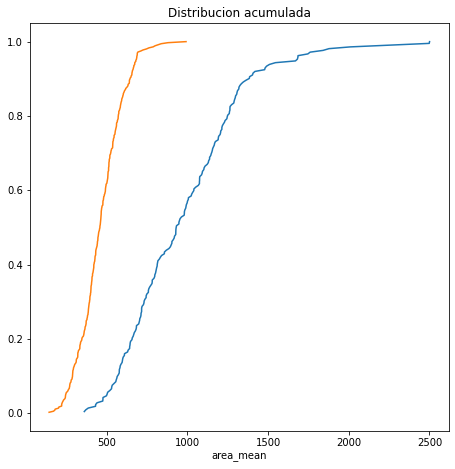

In [15]:
pruebaTShuffling(df,'diagnosis','M','B','area_mean',10000)

'P-value MEAN: 0.0 , P-value STD: 0.2659, DiffMeans : 3.6901437556154555 , DiffVars : -0.2189797170760115'

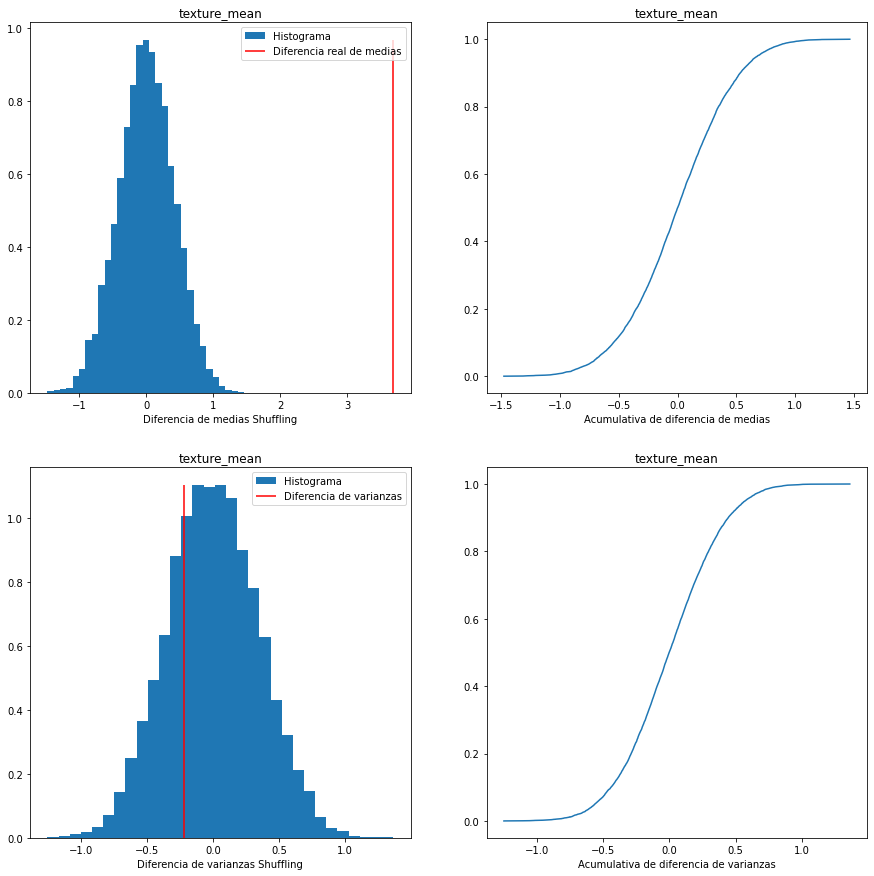

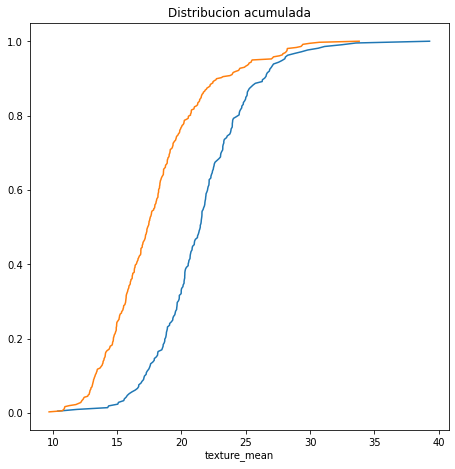

In [16]:
pruebaTShuffling(df,'diagnosis','M','B','texture_mean',10000)

'P-value MEAN: 0.0 , P-value STD: 0.0, DiffMeans : 0.06510316117012842 , DiffVars : 0.02015736294643105'

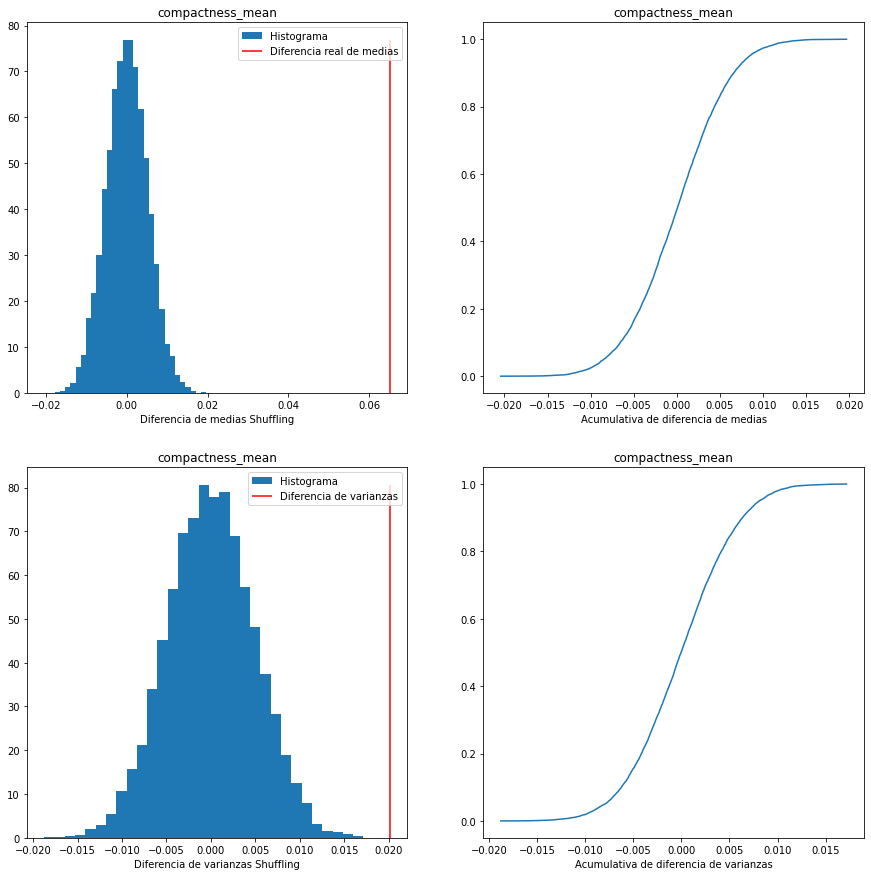

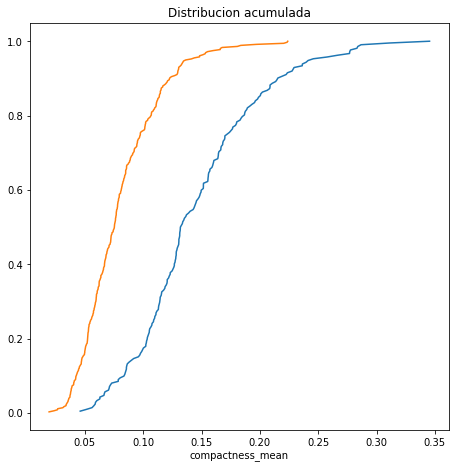

In [17]:
pruebaTShuffling(df,'diagnosis','M','B','compactness_mean',10000)

'P-value MEAN: 0.0 , P-value STD: 0.0, DiffMeans : 0.11471709597272872 , DiffVars : 0.03146092130394103'

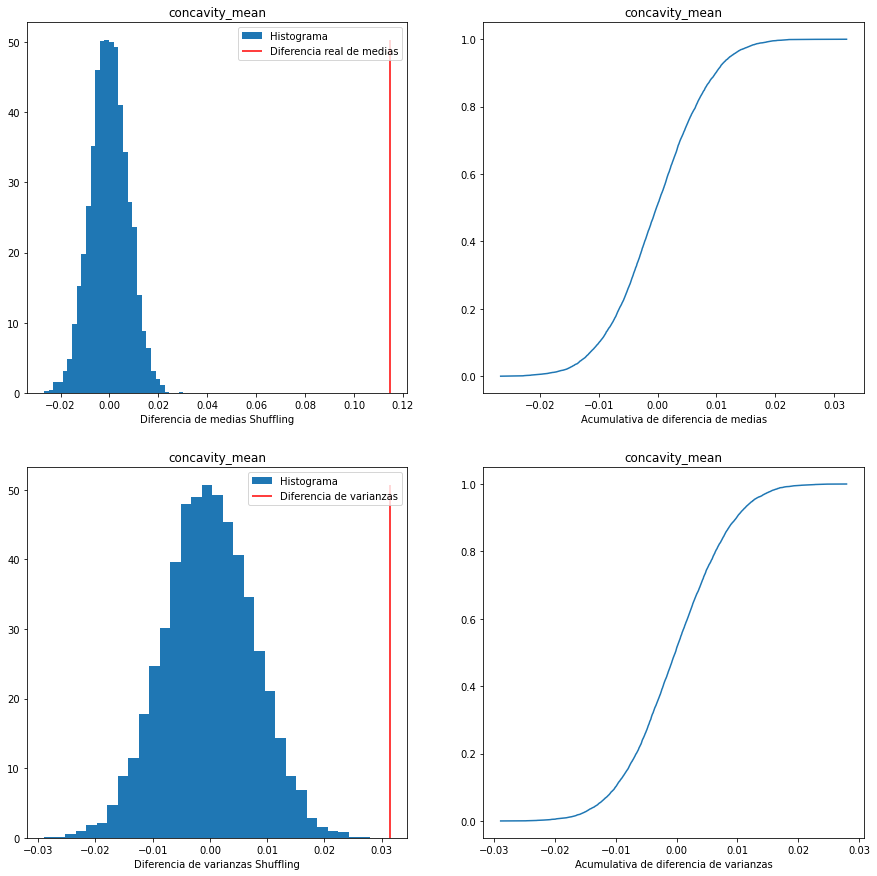

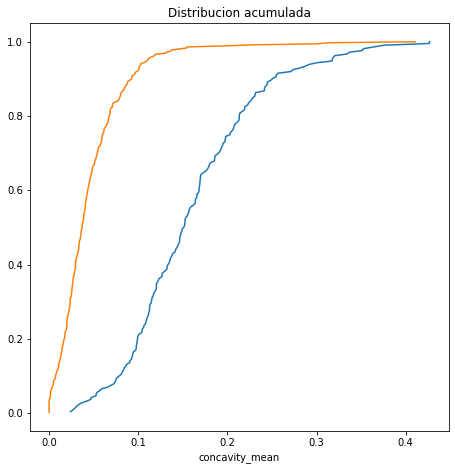

In [18]:
pruebaTShuffling(df,'diagnosis','M','B','concavity_mean',10000)

## Regresión Lineal

In [19]:
# Acondicionamiento M/B a numérico

a = df.to_numpy()
indM = np.where(a == 'M')
indB = np.where(a == 'B')

a[indM] = 1
a[indB] = 0

df = pd.DataFrame(a, columns = campos)

In [20]:
Y = np.array(df['diagnosis'])

params = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
          'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = np.array(df[params])

X_train, X_test, Y_train, Y_test  = sklearn.model_selection.train_test_split(X, Y, test_size=0.4)

regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X_train, Y_train)

LinearRegression()

In [21]:
coeffs = np.hstack((regresion.intercept_, regresion.coef_))
coeffs

array([-2.56194649e+00,  4.94605982e-01,  2.00584751e-02, -5.51873354e-02,
       -6.67448192e-04,  4.93719324e+00, -5.46652674e-01,  2.79496508e+00,
        6.85767518e-01,  4.44442540e+00])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


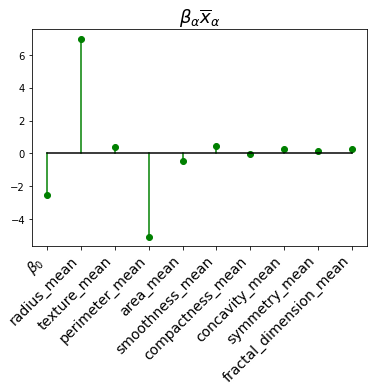

In [22]:
promedios = np.zeros(len(params) + 1)

promedios[0] = 1

for i in range(1, len(promedios)):
    promedios[i] = np.mean(df[params[i-1]])

markerline, stemlines, baseline = plt.stem(np.multiply(promedios, coeffs))
plt.setp(baseline, color = 'k')
plt.setp(markerline, color = 'g')
plt.setp(stemlines, color = 'g')
plt.title(r'$\beta_\alpha\overline{x}_\alpha$', fontsize = 18)

str_coeff_list = [r'$\beta_0$'] + params
plt.xticks(ticks = range(0,len(promedios)), labels = str_coeff_list, rotation=45, ha="right", fontsize = 14);

In [23]:
score = regresion.score(X_test, Y_test)
print('Score:', score)

Score: 0.6621770780325352


## Clasificación

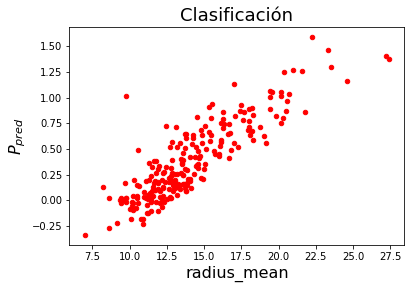

In [24]:
y_predict = regresion.predict(X_test)
plt.scatter(X_test[:,0], y_predict, s = 20, c = 'r')
plt.ylabel(r'$P_{pred}$', fontsize = 16)
plt.title('Clasificación', fontsize = 18)
plt.xlabel(params[0], fontsize = 16);

In [25]:
matches = 0
posneg = 0
negpos = 0

guess = np.round(y_predict)

for i in range(len(guess)):
    if(guess[i] != 0 and guess[i] != 1):
        guess[i] = guess[i]/np.abs(guess[i])
        if(guess[i] < 0 ):
            guess[i] = 0
    if(guess[i] == Y_test[i]):
        matches = matches + 1
    elif(guess[i] == 1):
        posneg = posneg + 1
    else:
        negpos = negpos + 1


print('Match: ', (matches/len(guess))*100, '%')
print('Posneg: ', (posneg/len(guess))*100, '%')
print('Negpos: ', (negpos/len(guess))*100, '%')
print('Error: ', ((posneg + negpos)/len(guess))*100, '%')

Match:  93.85964912280701 %
Posneg:  1.3157894736842104 %
Negpos:  4.824561403508771 %
Error:  6.140350877192982 %


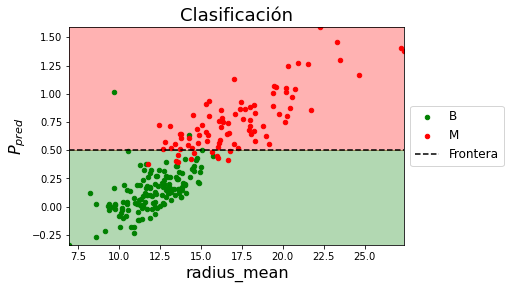

In [26]:
fig, ax = plt.subplots()
iM = np.where(Y_test == 1)
iB = np.where(Y_test == 0)

xinf = np.min(X_test[:,0])
xsup = np.max(X_test[:,0])

yinf = np.min(y_predict)
ysup = np.max(y_predict)
            
plt.scatter(X_test[iB,0], y_predict[iB], s = 20, color = 'g', label = 'B', zorder = 2)
plt.scatter(X_test[iM,0], y_predict[iM], s = 20, color = 'r', label = 'M', zorder = 2)

rectM = mtp.patches.Rectangle((xinf, 0.5), xsup - xinf, ysup - 0.5, color = 'r', alpha = 0.3, zorder = 1)
rectB = mtp.patches.Rectangle((xinf, yinf), xsup - xinf, 0.5 - yinf, color = 'g', alpha = 0.3, zorder = 1)

ax.add_patch(rectM)
ax.add_patch(rectB)

plt.hlines(0.5, xinf, xsup, linestyles = 'dashed', color = 'k', label = 'Frontera')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 12)
plt.ylabel(r'$P_{pred}$', fontsize = 16)
plt.title('Clasificación', fontsize = 18)
plt.xlabel(params[0], fontsize = 16)
plt.xlim([xinf, xsup])
plt.ylim([yinf, ysup]);